Listing all files in /kaggle/input/inception-v3/:
Directory: /kaggle/input/inception-v3/
Files: ['converted_labels.csv']
Subdirectories: ['resized_images-20250518T183544Z-1-001', 'files-20250518T181914Z-1-001']
Directory: /kaggle/input/inception-v3/resized_images-20250518T183544Z-1-001
Subdirectories: ['resized_images']
Directory: /kaggle/input/inception-v3/resized_images-20250518T183544Z-1-001/resized_images
Subdirectories: ['srilanka_floods', 'iraq_iran_earthquake', 'Hurricane_Harvey', 'Hurricane_Maria', 'Hurricane_Irma', 'California_Wildfires', 'mexico_earthquake']
Directory: /kaggle/input/inception-v3/resized_images-20250518T183544Z-1-001/resized_images/srilanka_floods
Files: ['869990496021626880_0.jpg', '875763051882045444_0.jpg', '872235889820291072_1.jpg', '869972354004393987_0.jpg', '875202637473476609_1.jpg', '871514121799213058_0.jpg', '870668890564567040_0.jpg', '870233018341797888_0.jpg', '881230355319201794_0.jpg', '872447183450234880_0.jpg']
Directory: /kaggle/input/incep

I0000 00:00:1747740665.673553      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1747740723.035362     122 service.cc:148] XLA service 0x7d51580052a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747740723.038615     122 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1747740728.296949     122 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1747740761.926261     122 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.8156 - loss: 0.3828
Epoch 1
Train - Loss: 0.3275, Acc: 0.8418
Val   - Loss: 0.6110, Acc: 0.6998
Test  - Acc: 0.7721, Precision: 0.8786, Recall: 0.6483, F1: 0.7461
Saving model with improved TEST F1 Score: 0.7461
518/518 ━━━━━━━━━━━━━━━━━━━━ 297s 399ms/step - accuracy: 0.8157 - loss: 0.3827 - val_accuracy: 0.6998 - val_loss: 0.6110
Epoch 2/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.9120 - loss: 0.1939
Epoch 2
Train - Loss: 0.2068, Acc: 0.9071
Val   - Loss: 1.1069, Acc: 0.5638
Test  - Acc: 0.6737, Precision: 0.9198, Recall: 0.4033, F1: 0.5607
518/518 ━━━━━━━━━━━━━━━━━━━━ 144s 278ms/step - accuracy: 0.9119 - loss: 0.1939 - val_accuracy: 0.5638 - val_loss: 1.1069
Epoch 3/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.9423 - loss: 0.1362
Epoch 3
Train - Loss: 0.1500, Acc: 0.9352
Val   - Loss: 0.5928, Acc: 0.7655
Test  - Acc: 0.7882, Precision: 0.8471, Recall: 0.7198, F1: 0.7783
Saving model with improved 

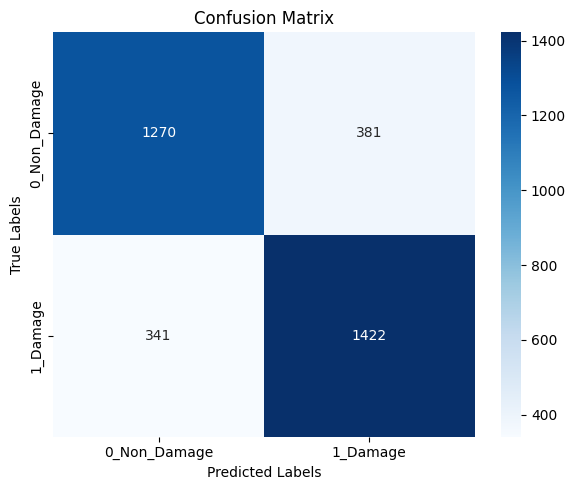

Classification Report:
               precision    recall  f1-score   support

0_Non_Damage     0.7883    0.7692    0.7787      1651
    1_Damage     0.7887    0.8066    0.7975      1763

    accuracy                         0.7885      3414
   macro avg     0.7885    0.7879    0.7881      3414
weighted avg     0.7885    0.7885    0.7884      3414


Final Test Metrics:
Accuracy: 0.7885
Precision: 0.7887
Recall: 0.8066
F1 Score: 0.7975


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths
base_dir = '/kaggle/input/inception-v3/resized_images-20250518T183544Z-1-001/resized_images/'  # Base directory with subfolders
csv_path = '/kaggle/input/inception-v3/converted_labels.csv'  # CSV file path
train_dir = '/kaggle/working/train/'  # Writable train directory
test_dir = '/kaggle/working/test/'  # Writable test directory
IMG_SIZE = (299, 299)
BATCH_SIZE = 32

# Debug: Inspect dataset structure recursively
print("Listing all files in /kaggle/input/inception-v3/:")
for root, dirs, files in os.walk('/kaggle/input/inception-v3/'):
    print(f"Directory: {root}")
    if files:
        print(f"Files: {files[:10]}")  # Show first 10 files
    if dirs:
        print(f"Subdirectories: {dirs}")

# Debug: Collect all image files from subfolders
image_files = []
subfolders = ['srilanka_floods', 'iraq_iran_earthquake', 'Hurricane_Harvey', 'Hurricane_Maria', 
              'Hurricane_Irma', 'California_Wildfires', 'mexico_earthquake']
for subfolder in subfolders:
    subfolder_path = os.path.join(base_dir, subfolder)
    if os.path.exists(subfolder_path):
        files = [os.path.join(subfolder, f) for f in os.listdir(subfolder_path) 
                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        image_files.extend(files)
        print(f"\nFound {len(files)} images in {subfolder_path}: {files[:5]}")
    else:
        print(f"Warning: Subfolder not found: {subfolder_path}")

print(f"\nTotal image files found: {len(image_files)}")
print(f"Sample image files: {image_files[:5]}")

# Debug: Verify CSV exists
print("\nChecking csv_path:", csv_path)
if not os.path.exists(csv_path):
    print(f"Error: CSV file {csv_path} not found.")
    print("Files in /kaggle/input/inception-v3/:")
    print(os.listdir('/kaggle/input/inception-v3/'))

# Load CSV and prepare data
df = pd.read_csv(csv_path)
df['filename'] = df['image_id']  # Assume image_id includes extension or subfolder
df['filename_alt'] = df['image_id'].apply(lambda x: f"{x}.jpg")  # Alternative with .jpg
df['label'] = df['image_info'].apply(lambda x: '1_Damage' if x.lower() == 'damage' else '0_Non_Damage')

# Debug: Print CSV details
print("\nSample CSV data:")
print(df[['image_id', 'filename', 'filename_alt', 'image_info', 'label']].head(10))
print(f"Total images in CSV: {len(df)}")
print("Label distribution:")
print(df['image_info'].value_counts())

# Filter CSV to only include existing images
available_images = set([os.path.basename(f) for f in image_files] + 
                      [os.path.splitext(os.path.basename(f))[0] for f in image_files])
original_len = len(df)
df = df[df['filename'].isin(available_images) | df['filename_alt'].isin(available_images)]
print(f"\nFiltered CSV to {len(df)} images that exist in subfolders (from {original_len})")
if len(df) == 0:
    print("Images in CSV but not in subfolders:", list(set(df['filename']).difference(available_images))[:10])
    print("Images in subfolders but not in CSV:", list(set(available_images).difference(set(df['filename'])))[:10])
    raise ValueError("No matching images found in subfolders. Check filename consistency.")

# Create directories in Kaggle's writable filesystem
os.makedirs(os.path.join(train_dir, '0_Non_Damage'), exist_ok=True)
os.makedirs(os.path.join(train_dir, '1_Damage'), exist_ok=True)
os.makedirs(os.path.join(test_dir, '0_Non_Damage'), exist_ok=True)
os.makedirs(os.path.join(test_dir, '1_Damage'), exist_ok=True)

# Split data: 80% train, 20% test
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
print(f"\nTrain set size: {len(train_df)}, Test set size: {len(test_df)}")

# Copy images to respective train/test folders
train_copied = 0
test_copied = 0

for _, row in train_df.iterrows():
    src = None
    for subfolder in subfolders:
        for fname in [row['filename'], row['filename_alt']]:
            potential_src = os.path.join(base_dir, subfolder, fname)
            if os.path.exists(potential_src):
                src = potential_src
                break
        if src:
            break
    if src:
        dest = os.path.join(train_dir, row['label'], os.path.basename(src))
        shutil.copy(src, dest)
        train_copied += 1
    else:
        print(f"Warning: Image not found for {row['filename']} or {row['filename_alt']}")

for _, row in test_df.iterrows():
    src = None
    for subfolder in subfolders:
        for fname in [row['filename'], row['filename_alt']]:
            potential_src = os.path.join(base_dir, subfolder, fname)
            if os.path.exists(potential_src):
                src = potential_src
                break
        if src:
            break
    if src:
        dest = os.path.join(test_dir, row['label'], os.path.basename(src))
        shutil.copy(src, dest)
        test_copied += 1
    else:
        print(f"Warning: Image not found for {row['filename']} or {row['filename_alt']}")

print(f"Copied {train_copied} images to train directory")
print(f"Copied {test_copied} images to test directory")

# Count images in each class
num_non_damage = len(os.listdir(os.path.join(train_dir, '0_Non_Damage')))
num_damage = len(os.listdir(os.path.join(train_dir, '1_Damage')))
print(f"Train - Non-Damage: {num_non_damage}, Damage: {num_damage}")

# Check if any images were copied
if num_non_damage == 0 and num_damage == 0:
    raise ValueError("No images were copied to train directory. Check subfolder paths and image filenames.")

# Augmentation to balance classes
augmentation_factor = max(1, num_non_damage // num_damage if num_damage > 0 else 1)
print(f"Augmenting each Damage image {augmentation_factor} times")

datagen_aug = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

# Augment Damage images
damage_dir = os.path.join(train_dir, '1_Damage')
for img_file in os.listdir(damage_dir):
    img_path = os.path.join(damage_dir, img_file)
    if not os.path.exists(img_path):
        print(f"Warning: Augmented image path not found: {img_path}")
        continue
    img = load_img(img_path)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    save_prefix = f"aug_{os.path.splitext(img_file)[0]}"
    i = 0
    for batch in datagen_aug.flow(img_array, batch_size=1, save_to_dir=damage_dir, save_prefix=save_prefix, save_format='jpg'):
        i += 1
        if i >= augmentation_factor:
            break
print("Augmentation complete!")

# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    classes=['0_Non_Damage', '1_Damage'],
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    classes=['0_Non_Damage', '1_Damage'],
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    classes=['0_Non_Damage', '1_Damage'],
    shuffle=False
)

# Verify generator output
print(f"Train generator images: {train_generator.samples}")
print(f"Validation generator images: {val_generator.samples}")
print(f"Test generator images: {test_generator.samples}")

if train_generator.samples == 0:
    raise ValueError("Train generator found 0 images. Check train directory and image files.")

# Compute class weights
train_labels = train_generator.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class Weights:", class_weight_dict)

# Custom Callback to Save Best Model Based on Test F1 Score
class BestTestF1ModelSaver(Callback):
    def __init__(self, test_data, save_path='/kaggle/working/best_test_f1_model.keras'):
        super(BestTestF1ModelSaver, self).__init__()
        self.test_data = test_data
        self.best_test_f1 = 0.0
        self.save_path = save_path

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        train_loss = logs.get('loss', 0.0)
        train_acc = logs.get('accuracy', 0.0)
        val_loss = logs.get('val_loss', 0.0)
        val_acc = logs.get('val_accuracy', 0.0)

        # Evaluate on test data
        self.test_data.reset()
        y_true = self.test_data.classes
        y_pred_probs = self.model.predict(self.test_data, verbose=0)
        y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

        # Calculate metrics
        test_acc = accuracy_score(y_true, y_pred)
        test_precision = precision_score(y_true, y_pred, pos_label=1)
        test_recall = recall_score(y_true, y_pred, pos_label=1)
        test_f1 = f1_score(y_true, y_pred, pos_label=1)

        print(f"\nEpoch {epoch+1}")
        print(f"Train - Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
        print(f"Val   - Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")
        print(f"Test  - Acc: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")

        # Save model if test F1 score improves
        if test_f1 > self.best_test_f1:
            print(f"Saving model with improved TEST F1 Score: {test_f1:.4f}")
            self.best_test_f1 = test_f1
            self.model.save(self.save_path)

# Model Architecture
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=IMG_SIZE + (3,))
base_model.trainable = True
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weight_dict,
    callbacks=[BestTestF1ModelSaver(test_generator)],
    verbose=1
)

# Load Best Model and Evaluate
model = tf.keras.models.load_model('/kaggle/working/best_test_f1_model.keras')

# Predict on Test Data
test_generator.reset()
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(test_generator.class_indices.keys())
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print("Classification Report:\n", report)

# Final Test Metrics
test_acc = accuracy_score(y_true, y_pred)
test_precision = precision_score(y_true, y_pred, pos_label=1)
test_recall = recall_score(y_true, y_pred, pos_label=1)
test_f1 = f1_score(y_true, y_pred, pos_label=1)
print(f"\nFinal Test Metrics:")
print(f"Accuracy: {test_acc:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")